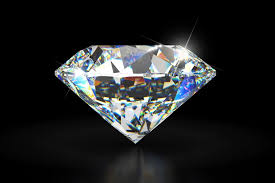

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import svm

### Import the data

In [ ]:
address = r'../input/beginner-datasets/beginner_datasets/diamond.csv'
df=pd.read_csv(address)
df.head(10)

## Attribute Information

Carat Weight: in grams

Cut: how good the cut is

Color: the color of the diamond

Clarity: diamond clarity rating

Polish: diamond polish rating

Symmetry: diamond symmetry rating

Report: which company has graded the diamond

Price: in US dollars

In [ ]:
df.describe()

### Replace object values with numeric values

In [ ]:
labelencoder = LabelEncoder()
df['Report']=pd.get_dummies(df['Report'])
df['Cut'] = labelencoder.fit_transform(df['Cut'])
df['Color'] = labelencoder.fit_transform(df['Color'])
df['Clarity'] = labelencoder.fit_transform(df['Clarity'])
df['Polish'] = labelencoder.fit_transform(df['Polish'])
df['Symmetry'] = labelencoder.fit_transform(df['Symmetry'])
df.head()

Let's check for null values

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

### Let's check whether the company reporting on the diamonds affects their value

In [ ]:
check = sns.barplot(x=df['Report'], y=df['Price'], data=df, linewidth=2.5, color="salmon", errcolor=".2", edgecolor=".2")
plt.title('Reporting Companies Price Comparison')
plt.xlabel('Reporting Company')
plt.show()
print('0 = GIA ,1 = AGSL')

Let's delete the report column, since it has no significance

In [ ]:
df=df.drop(labels = "Report", axis = 1)

# Correlation chart

In [ ]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="Accent",annot=True)
plt.show()

In [ ]:
df.hist(bins=50, figsize=(20,15), color = 'Black')
plt.show()

### Diamonds cut chart

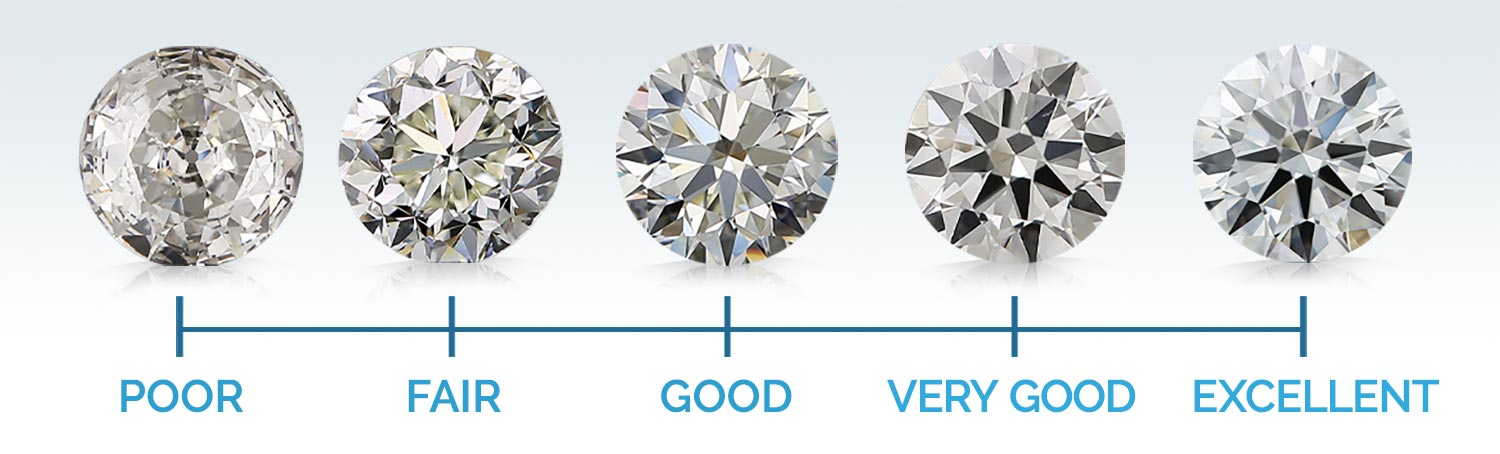

In [ ]:
sns.barplot(x='Cut',y = 'Price', data=df)
plt.show()

0 = fair
1 = good
2 = ideal
3 = signature ideal
4 = very good

### Diamonds clarity chart

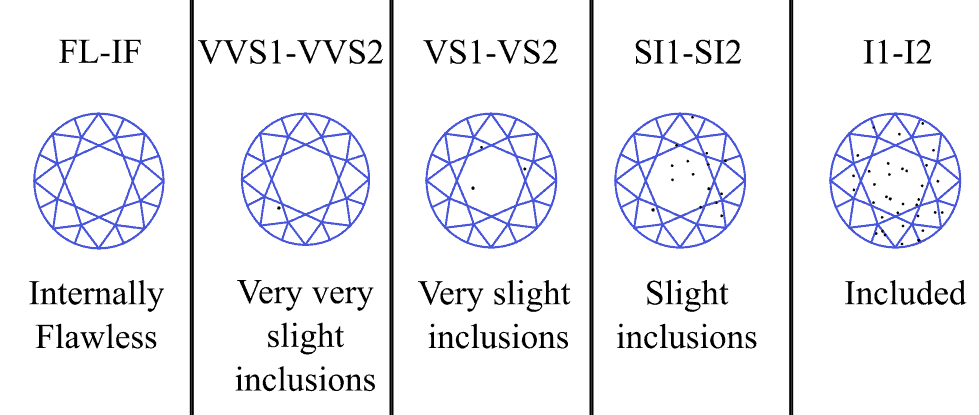

In [ ]:
sns.barplot(x='Clarity' , y='Price' , data=df )
plt.title('Clarity - Price Correlation')
plt.xlabel('Clarity Ranking')
plt.show()
print('0 = FL','1 = IF','2 = SI1','3 = VS1','4 = VS2','5 = VVS1','6 = VVS2')
df['Clarity'].value_counts()

Although the 4 diamonds rated 0 (=Flawless) for clarity have significantly higher prices, since there are only 4 of them they don't affect the data analysis and models. Therefore I didn't remove them from the data. They aren't outliers, since their prices (behavior) match their group's.

In [ ]:
plt.scatter(df['Carat Weight'],df['Price'],color='pink')
plt.title('Carat Weight')
plt.xlabel('Carat Weight in Grams')
plt.ylabel('Price')
plt.show()

#### One carat diamond weighs 0.2 grams

### Diamonds color chart

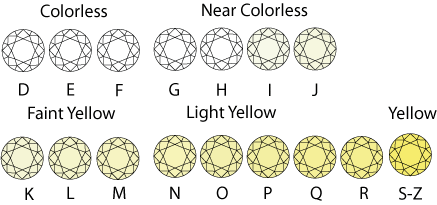

In [ ]:
sns.barplot(x=df['Color'], y=df['Price'], palette="Reds_d")
plt.title('Color - Price Correlation')
plt.show()
print('0 = D','1 = E','2 = F','3 = G','4 = H','5 = I')

### Diamonds symmetry chart

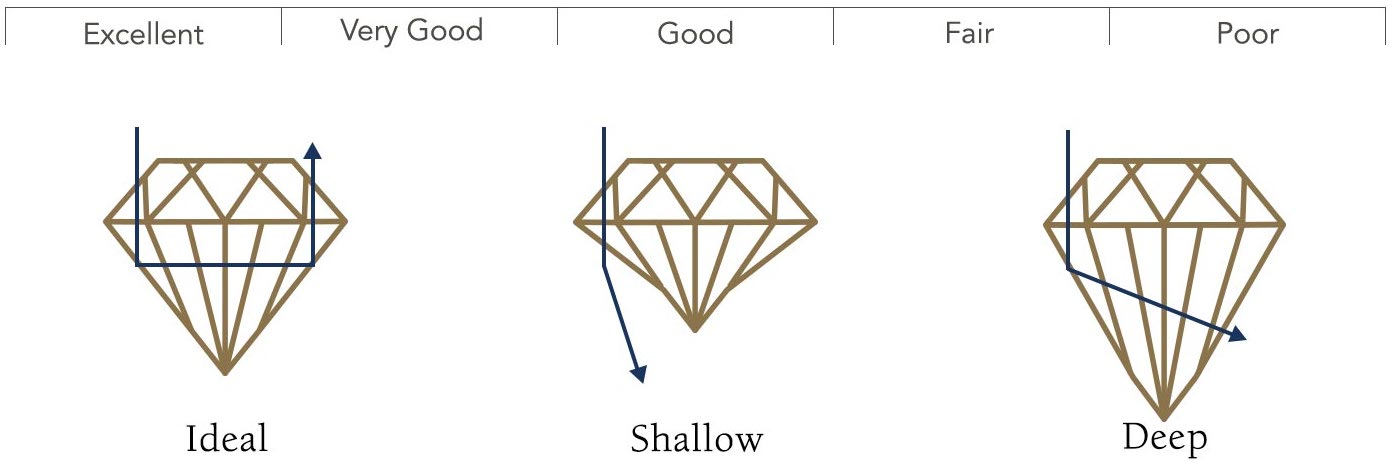

In [ ]:
sns.jointplot(x='Symmetry' , y='Price' , data=df , height=5 , color = 'Green')
plt.title('Symmetry')
plt.show()
print('0 = excellent','1 = good','2 = ideal','3 = very good')

In [ ]:
sns.catplot(x="Polish", y="Price", data=df)
plt.title('Polish')
plt.xlabel('Polish Ranking')
plt.show()
print('0 = excellent','1 = good','2 = ideal','3 = very good')

## Divide data into training and testing sets

In [ ]:
x = df.drop('Price', axis = 1)
y = df.Price
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

### Linear Regression

In [ ]:
regr = LinearRegression()
regr.fit(x_train,y_train)
lin_prediction = regr.predict(x_test)

Let's check the Linear Regression's results

In [ ]:
print("MAE:", mean_absolute_error(y_test, lin_prediction))
linModel = LinearRegression().fit(x_train,y_train)
print("Score:" ,linModel.score(x_train,y_train))
lin_scores = cross_val_score(linModel, x, y, cv=5)
print("Cross Validation scores mean:",lin_scores.mean())

### KNN
### K = 2

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(x_train,y_train)
knn_prediction = knn.predict(x_test)

Let's look at a range of k values

In [ ]:
arr = []
for i in range(1,15):
    knn2 = KNeighborsRegressor(n_neighbors = i)
    knn2.fit(x_train, y_train)
    linModel = KNeighborsRegressor(n_neighbors = i).fit(x_train,y_train)
    arr.append(linModel.score(x_train,y_train))
    
plt.plot(range(1,15), arr)
plt.xticks(np.arange(1,15,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

Let's check the KNN Regressor's results

In [ ]:
knn_scores = cross_val_score(knn, x, y, cv=4)
knn_model = KNeighborsRegressor(n_neighbors = 2).fit(x_train,y_train)
print("Cross Validation scores mean:",knn_scores.mean())
print("Score:" , knn_model.score(x_train,y_train))

### Decision Tree  Regressor

In [ ]:
model = DecisionTreeRegressor(random_state = 0)
model.fit(x_train, y_train)
dtr_prediction = model.predict(x_test)

Let's check the Decision Tree Regressor's results

In [ ]:
print("MAE:", mean_absolute_error(y_test, dtr_prediction))
dtrModel = DecisionTreeRegressor().fit(x_train,y_train)
print("Score: ", dtrModel.score(x_train,y_train))
dtr_scores = cross_val_score(dtrModel, x, y, cv=5)
print("Cross Validation scores mean:", dtr_scores.mean())

In [ ]:
arrX = ['Linear Regression','KNN', 'Decision Tree Regressor']
arrY = [lin_scores.mean()*100,knn_scores.mean()*100, dtr_scores.mean()*100]
plt.plot (arrX, arrY, linestyle='--',color='purple')
plt.title("Model Results Comparison", fontsize = 18)
plt.xlabel("Model")
plt.ylabel("Cross Validation Score Mean (%)")
plt.show()

# The end